<a href="https://colab.research.google.com/github/rahulmnair1997/LabelMaster_Sales_Forecasting/blob/main/EDA_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import sys
import numpy as np
import warnings
!cat '/content/drive/MyDrive/Label_Master Forecasting Datasets/feature_selector.py'
sys.path.append('/content/drive/MyDrive/Label_Master Forecasting Datasets/')
from feature_selector import FeatureSelector
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.inf)

In [255]:
books = pd.read_csv('/content/drive/MyDrive/Label_Master Forecasting Datasets/Books_ext.csv', index_col=0)
books

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Truckload (TL) Rates (rev/mi)_rates_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,...,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,Mexico Origin Intermodal Volumes_International_y.1,Mexico Origin Intermodal Volumes_Domestic_y.1,Mexico Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Import

In [256]:
books = books.drop(books.index[155:157])
books = books.set_index(keys='Year_Month')
books

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Truckload (TL) Rates (rev/mi)_rates_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,...,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,Mexico Origin Intermodal Volumes_International_y.1,Mexico Origin Intermodal Volumes_Domestic_y.1,Mexico Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Can

### Drop columns with null values

In [257]:
sum(books.isnull().sum()!=0)

188

There are 188 columns contain null values.

In [258]:
books = books.dropna(axis=1, how='any')

In [259]:
sum(books.isnull().sum()!=0)

0

In [260]:
books

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,Total TL Reefer Rates (w/o FSC)_rates_m_trucking,...,Retail Sales (Mil $)_y.1,Consumer Price Index_y.1,Consumer Confidence (Conference Board)_y.1,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Imports_y.1",

453 columns are left after dropping columns contain null values

### Check whethere there are duplicate columns

In [261]:
def getDuplicateColumns(df): 
    duplicateColumnNames = set()  
    # Iterate through all the columns  
    # of dataframe 
    for x in range(df.shape[1]):     
        # Take column at xth index. 
        col = df.iloc[:, x] 
        # Iterate through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, df.shape[1]): 
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y])      
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames) 

In [262]:
dups = getDuplicateColumns(books)
dups

['Unemployment Rate (%)_y',
 'National Avg. Diesel/Gal._y.1',
 "West Coast Port Container Activity (TEU's)_y",
 "Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y",
 'Non-Durable Manufacturing Index_y.1',
 'Total Intermodal (w/ FSC)_y',
 'N.A. Port Activity, Total TEUs_Exports_y',
 'ISM Manufacturing Index_x',
 'Total Manufacturing Index_x.1',
 'ISM Manufacturing Index_x.1',
 'Automobile and Light-Duty Vehicles Index_y',
 'N.A. Port Activity, Total TEUs_Imports_x.1',
 'Food Index_x.1',
 'Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y',
 'West Coast Port Activity, Total TEUs_SA Imports_y',
 "Payroll Employment (000's)_x.1",
 'Intermodal Revenue Movements (IANA-ETSO)_Domestic_y',
 'Retail Sales (Mil $)_x',
 'Canada Origin Intermodal Volumes_International_x.1',
 'West Coast Port Activity, Total TEUs_Imports_y.1',
 'Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1',
 'Durable Manufacturing Index_y',
 'Interest Rate Spread (

In [263]:
books = books.drop(columns=dups)
books

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,Total TL Reefer Rates (w/o FSC)_rates_m_trucking,...,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,BUILD FOR_MEMO_Total_Vans,BUILD FOR_MEMO_Total_Tanks,BUILD FOR_MEMO_Major_Voc,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,Intermodal Revenue Movements (IANA-ETSO)_International_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_x,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_x,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_x","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_x",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,U.S. Origin Intermodal Volumes_Domestic_x,U.S. Origin Intermodal Volumes_Total_x,Canada Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,Canada Origin Intermodal Volumes_Total_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","N.A. Port Activity, Total TEUs_SA Imports_x","West Coast Port Activity, Total TEUs_Imports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Imports_x","East Coast Port Activity, Total TEUs_Exports_x","East Coast Port Activity, Total TEUs_SA Imports_x","Gulf Coast Port Activity, Total TEUs_Imports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_SA Imports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs

###Feature Selection

In [218]:
X = books.drop(columns='Sum of Sales')
X.head()
y = books['Sum of Sales']
y

Year_Month
2008-01     282604.11
2008-02     262474.40
2008-03     326059.68
2008-04     215387.49
2008-05     499559.90
              ...    
2020-07     150348.10
2020-08     156066.95
2020-09     468710.96
2020-10    1118446.80
2020-11     429166.77
Name: Sum of Sales, Length: 155, dtype: float64

In [219]:
fs=FeatureSelector(data=X, labels=y)

#### Check missing values

In [220]:
fs.identify_missing(missing_threshold=0.9)

0 features with greater than 0.90 missing values.



#### Check Collinearity

In [221]:
fs.identify_collinear(correlation_threshold=0.9)

136 features with a correlation magnitude greater than 0.90.



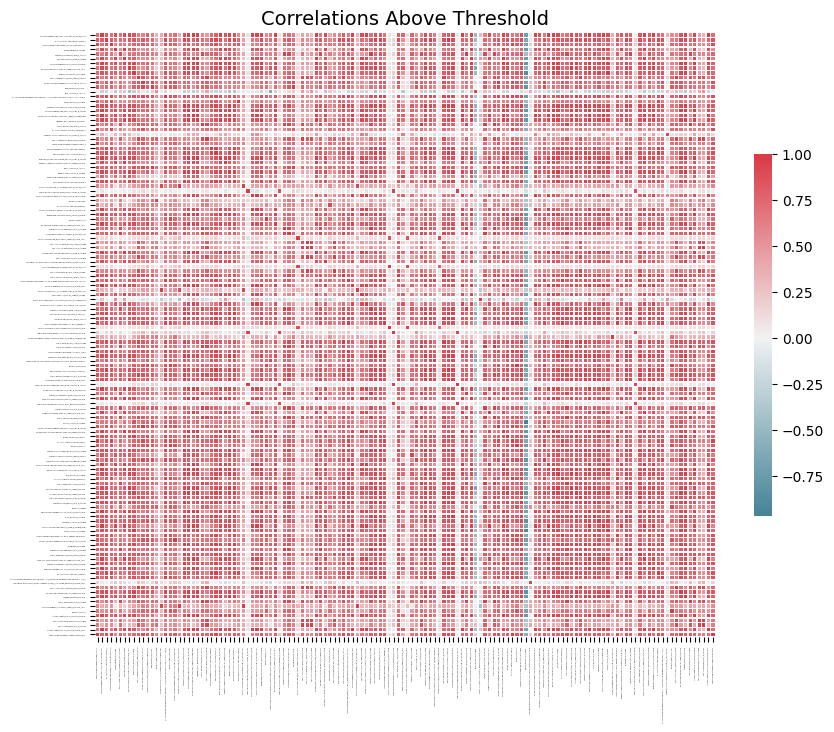

In [222]:
fs.plot_collinear()

In [233]:
collinear_features = fs.ops['collinear']
fs.record_collinear.head(20)

,drop_feature,corr_feature,corr_value
0,FTR Truck Loadings Index (2000=100)_freight_m_...,"FTR Truck Loadings (000s, SA)_freight_m_trucking",1.000000
1,"Dry Van Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.960822
2,"Dry Van Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.960822
3,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.994974
4,"Flatbed Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.994974
5,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","Dry Van Trailer Loadings (000s, SA)_freight_m_...",0.957094
6,"Bulk Trailer/Straight Truck Loadings (000s, SA...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.992075
7,"Bulk Trailer/Straight Truck Loadings (000s, SA...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.992075
8,"Bulk Trailer/Straight Truck Loadings (000s, SA...","Dry Van Trailer Loadings (000s, SA)_freight_m_...",0.933677
9,"Bulk Trailer/Straight Truck Loadings (000s, SA...","Flatbed Trailer Loadings (000s, SA)_freight_m_...",0.988296


#### Check zero importance features

In [235]:
fs.identify_zero_importance(task='regression', eval_metric='mse', early_stopping=False)


Training Gradient Boosting Model


25 features with zero importance after one-hot encoding.



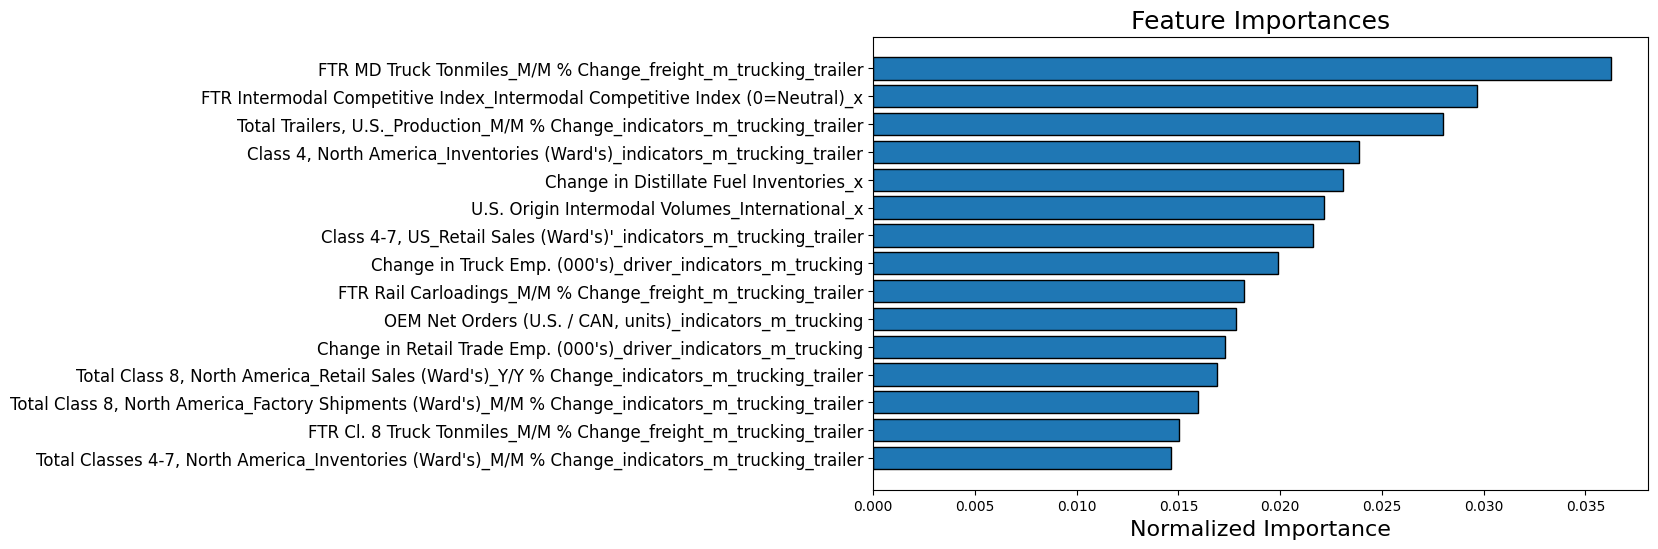

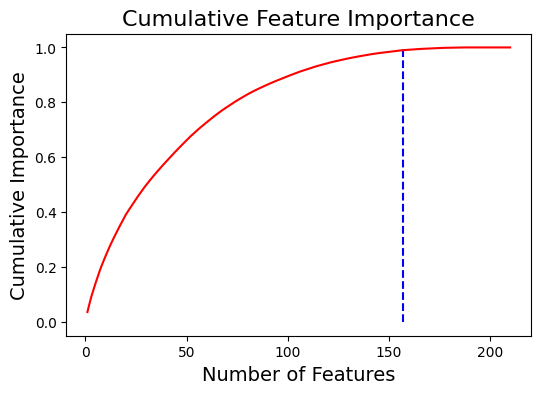

157 features required for 0.99 of cumulative importance


In [225]:
fs.plot_feature_importances(threshold=0.99)

#### Check Low Importance Features

In [226]:
fs.identify_low_importance(cumulative_importance=0.99)
fs.feature_importances.head(20)

156 features required for cumulative importance of 0.99 after one hot encoding.
54 features do not contribute to cumulative importance of 0.99.



,feature,importance,normalized_importance,cumulative_importance
0,FTR MD Truck Tonmiles_M/M % Change_freight_m_t...,193.0,0.036265,0.036265
1,FTR Intermodal Competitive Index_Intermodal Co...,158.0,0.029688,0.065953
2,"Total Trailers, U.S._Production_M/M % Change_i...",149.0,0.027997,0.093950
3,"Class 4, North America_Inventories (Ward's)_in...",127.0,0.023863,0.117813
4,Change in Distillate Fuel Inventories_x,123.0,0.023112,0.140924
5,U.S. Origin Intermodal Volumes_International_x,118.0,0.022172,0.163097
6,"Class 4-7, US_Retail Sales (Ward's)'_indicator...",115.0,0.021608,0.184705
7,Change in Truck Emp. (000's)_driver_indicators...,106.0,0.019917,0.204622
8,FTR Rail Carloadings_M/M % Change_freight_m_tr...,97.0,0.018226,0.222849
9,"OEM Net Orders (U.S. / CAN, units)_indicators_...",95.0,0.017850,0.240699


#### Remove features

In [269]:
feature_selected = fs.remove(methods=['missing','collinear','zero_importance','low_importance'])
features = np.append(list(['Sum of Sales']),list(feature_selected.columns))
books = books[features]
books

Removed 139 features.


,Sum of Sales,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking","New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicators_m_trucking",GMFN_indicators_m_trucking,G325_indicators_m_trucking,G332_indicators_m_trucking,ISM_indicators_m_trucking,PORTEU_indicators_m_trucking,MANEMP_indicators_m_trucking,USTRADE_indicators_m_trucking,LEI_indicators_m_trucking,SPREAD_indicators_m_trucking,D/GAL_indicators_m_trucking,D/STOCK_indicators_m_trucking,Change in Payroll Employment (000's)_driver_indicators_m_trucking,Change in Truck Emp. (000's)_driver_indicators_m_trucking,LABORINDEX_driver_indicators_m_trucking,"Total Class 8, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer","Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking_trailer",FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Carloadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Class 8 Truck Utilization (%, SA)_freight_m_trucking_trailer",BUILD FOR_Total_Trailer,BUILD FOR_Flatbed,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Acti

## Dimensionlity Reduction using Correaltion Matrix
Now that we have removed the duplicate columns, lets move ahead and find the corelated columns from the dataset.
The columns that are highly corelated can be eliminated to reduce the dimensionality. Following function creates the correlation matrix of all the exisiting columns and eliminates columns that are highly corelated.

In [ ]:
# def correlation(dataset, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#                 if colname in dataset.columns:
#                     del dataset[colname] # deleting the column from the dataset
#     print(len(dataset.columns))
# correlation(books,0.9)


91


As we have kept the threshold of 0.9, we are left with 91 columns in the dataset.

In [ ]:
# books.columns

Index(['Year_Month', 'Sum of Sales',
       'FTR Truck Loadings (000s, SA)_freight_m_trucking',
       'FTR Active Truck Utilization (%, SA)_freight_m_trucking',
       'Reefer Trailer Loadings (000s, SA)_freight_m_trucking',
       'Tank Trailer Loadings (000s, SA)_freight_m_trucking',
       'Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking',
       'Chemicals & Allied Products (000s, SA)_freight_m_trucking',
       'Transportation Equipment (000s, SA)_freight_m_trucking',
       'Spot TL Rates (w/o FSC)_rates_m_trucking',
       'Contract TL Rates (w/o FSC)_rates_m_trucking',
       'Contract TL Rates w/Fuel_rates_m_trucking',
       'Spot TL Flatbed Rates w/Fuel_rates_m_trucking',
       'Total LTL (w/o FSC)_rates_m_trucking',
       'Total LTL (w/ FSC)_rates_m_trucking',
       'Contract TL Tank Rates (w/o FSC)_rates_m_trucking',
       'OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking',
       'New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicat

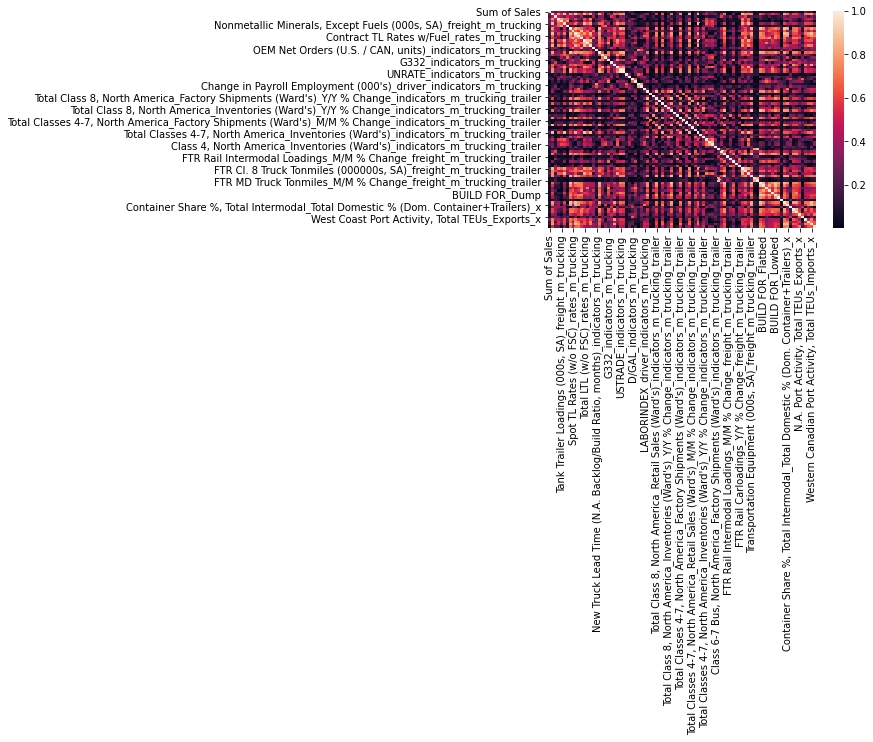

In [ ]:
import seaborn as sns
sns.heatmap(books.corr().abs())

In [ ]:
corr_matrix

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,Total TL Reefer Rates (w/o FSC)_rates_m_trucking,...,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,BUILD FOR_MEMO_Total_Vans,BUILD FOR_MEMO_Total_Tanks,BUILD FOR_MEMO_Major_Voc,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,Intermodal Revenue Movements (IANA-ETSO)_International_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_x,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_x,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_x","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_x",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,U.S. Origin Intermodal Volumes_Domestic_x,U.S. Origin Intermodal Volumes_Total_x,Canada Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,Canada Origin Intermodal Volumes_Total_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","N.A. Port Activity, Total TEUs_SA Imports_x","West Coast Port Activity, Total TEUs_Imports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Imports_x","East Coast Port Activity, Total TEUs_Exports_x","East Coast Port Activity, Total TEUs_SA Imports_x","Gulf Coast Port Activity, Total TEUs_Imports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_SA Imports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs